In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Mex.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==1]

In [7]:
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

C:\Users\lapep\AppData\Local\Temp\ipykernel_4676\2313346897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


In [8]:
df1=df1[df1['price'] <40000]

In [9]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [10]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [11]:
type(model)

sklearn.linear_model._base.LinearRegression

In [12]:
model.fit(X=X1, y=Y)

LinearRegression()

In [13]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(1613.4129476975554)}

In [14]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([1613.4129477, 1613.4129477, 1613.4129477, ..., 1613.4129477,
       1613.4129477, 1613.4129477], shape=(14072,))

<Axes: xlabel='room_type', ylabel='price'>

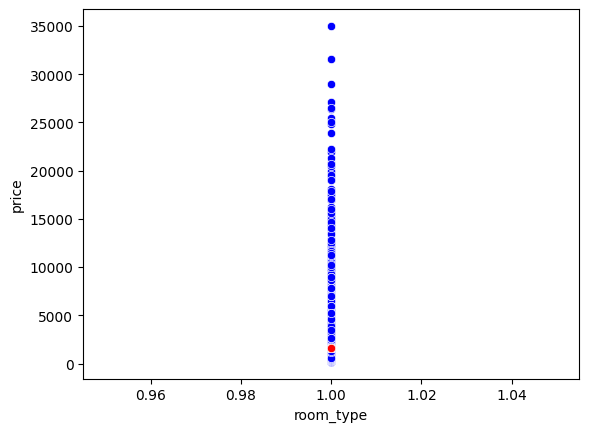

In [15]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [16]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [17]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [18]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [19]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [20]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [21]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [22]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.92226003]),
 'rank_': 1,
 'singular_': array([1936.34905194]),
 'intercept_': np.float64(1244.170853032204)}

In [23]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [24]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([1467.73967491, 1636.39685633, 1636.39685633, ..., 1385.37221422,
       1636.39685633, 1632.4745963 ], shape=(14072,))

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

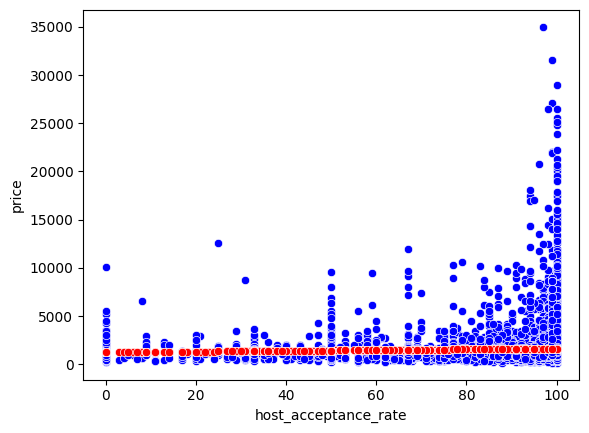

In [25]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [26]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.0014762555706173686

In [27]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.038422071399358056)

In [28]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_4676\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [29]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [30]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [31]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [32]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([1673.02465904, 1673.02465904, 1673.02465904, ..., 1549.89886981,
       1673.02465904, 1549.89886981], shape=(14072,))

<Axes: xlabel='host_is_superhost', ylabel='price'>

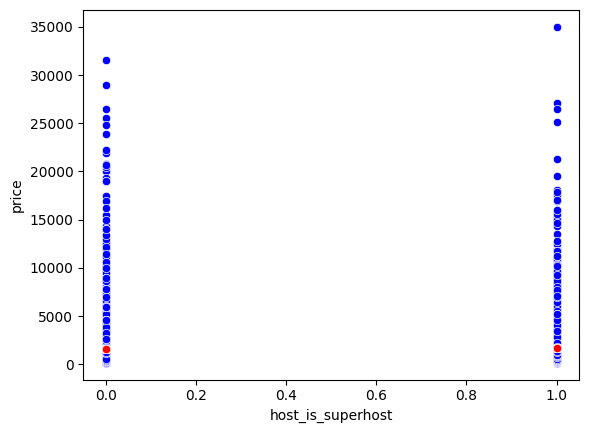

In [33]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [34]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.0013635746017975903

In [35]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.036926611025080415)

In [36]:
df1['bathrooms'] = df1['bathrooms'].round().astype(int)

In [37]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [38]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [39]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [40]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([3.08544034, 3.08544034, 4.02319002, ..., 4.02319002, 4.02319002,
       3.08544034], shape=(14072,))

<Axes: xlabel='bathrooms', ylabel='accommodates'>

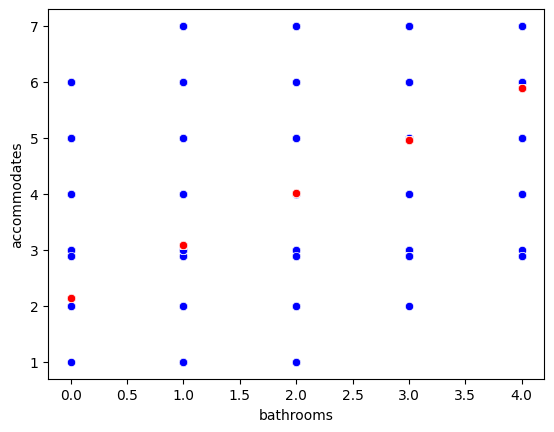

In [41]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [42]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.1723289302496458

In [43]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.4151251982831755)

In [44]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [45]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [46]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [47]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [48]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([1612.43202778, 1618.38866116, 1619.52325799, ..., 1591.15833715,
       1619.52325799, 1619.52325799], shape=(14072,))

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

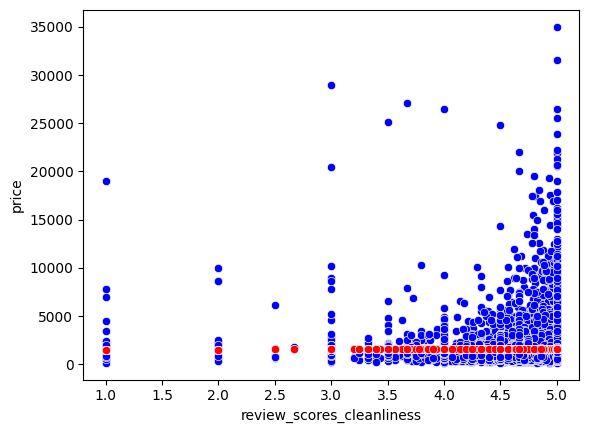

In [49]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [50]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

2.7188764980867752e-05

In [51]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.005214284704623229)

In [52]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_4676\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [53]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [54]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [55]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [56]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([1613.78016529, 1613.78016529, 1613.78016529, ..., 1613.78016529,
       1613.78016529, 1613.78016529], shape=(14072,))

<Axes: xlabel='host_identity_verified', ylabel='price'>

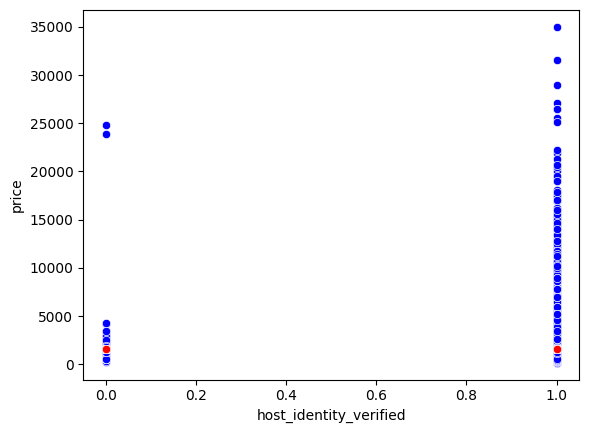

In [57]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [58]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

4.304352504869158e-06

In [59]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.002074693352008715)

In [60]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_4676\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [61]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [62]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [63]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [64]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([1543.19232276, 1543.19232276, 1543.19232276, ..., 1697.27693747,
       1697.27693747, 1697.27693747], shape=(14072,))

<Axes: xlabel='instant_bookable', ylabel='price'>

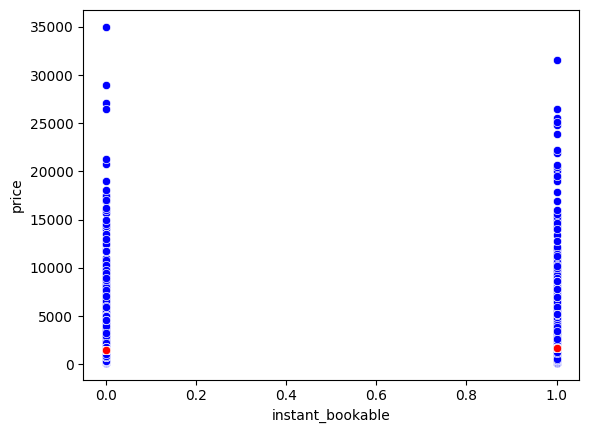

In [65]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [66]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.002120886981458736

In [67]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.046053088728756686)

In [68]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Entire bungalow':22,
    'Earthen home':23,
    'Entire hostel':24,
    'Entire in-law':25,
    'Holiday park':26,
    'Campsite':27,
    'Castle':28,
    'Hut':29,
    'Entire home/apt':30,
    'Shipping container':31,
    'Dome':32,
    'Tent':33,
    'Tower':34,
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_4676\2331864176.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [69]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [70]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [71]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [72]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([1642.6956474 , 1642.6956474 , 1582.2517568 , ..., 1320.32823088,
       1642.6956474 , 1642.6956474 ], shape=(14072,))

<Axes: xlabel='property_type', ylabel='price'>

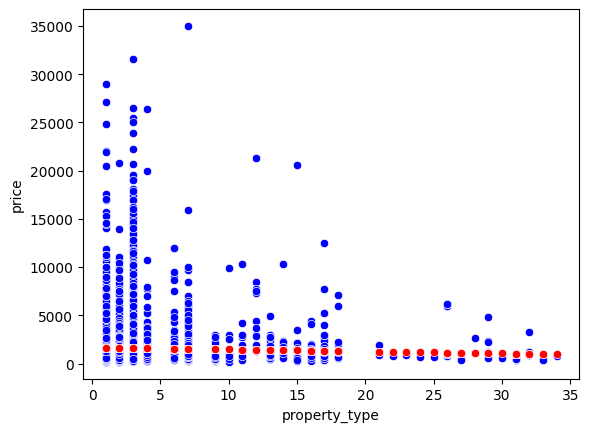

In [73]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [74]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.0015997915594537782

In [75]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.03999739440830838)

In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [77]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [78]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [79]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [80]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[  0.        ,  -7.36450762,   2.12217401,  30.4134935 ,
         113.79808767, 129.94506491, -19.86188996]]),
 'rank_': 6,
 'singular_': array([1936.46478866,  392.41434013,   60.07226737,   55.23232125,
          34.84659051,   12.45540667,    0.        ]),
 'intercept_': array([1349.59995629])}

In [81]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.93774968]]),
 'rank_': 1,
 'singular_': array([72.75841597]),
 'intercept_': array([2.14769066])}

In [82]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[1559.93215516],
       [1649.6390912 ],
       [1589.75884103],
       ...,
       [1219.2466195 ],
       [1779.28957581],
       [1663.36931412]], shape=(14072, 1))

In [83]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [84]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
2,1559.932155,2029.0,1,4.75,57.0,1,1,0,4.0,1,1
3,1649.639091,1140.0,1,4.96,100.0,1,1,0,2.0,1,1
4,1589.758841,3633.0,1,5.00,100.0,1,1,0,2.0,2,4
6,1606.554704,3671.0,1,4.84,98.0,1,1,0,2.9,1,3
9,1425.790901,7246.0,1,5.00,67.0,1,0,0,6.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
26463,1665.491488,1686.0,1,5.00,100.0,1,0,1,4.0,2,1
26464,1650.636270,564.0,1,5.00,93.0,1,0,1,2.0,1,1
26537,1219.246620,1200.0,1,4.00,36.0,1,0,1,2.9,2,17
26542,1779.289576,1360.0,1,5.00,100.0,1,1,1,4.0,2,1


In [85]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[3.08544034],
       [3.08544034],
       [4.02319002],
       ...,
       [4.02319002],
       [4.02319002],
       [3.08544034]], shape=(14072, 1))

In [86]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
2,1559.932155,3.08544,2029.0,1,4.75,57.0,1,1,0,4.0,1,1
3,1649.639091,3.08544,1140.0,1,4.96,100.0,1,1,0,2.0,1,1
4,1589.758841,4.02319,3633.0,1,5.00,100.0,1,1,0,2.0,2,4
6,1606.554704,3.08544,3671.0,1,4.84,98.0,1,1,0,2.9,1,3
9,1425.790901,3.08544,7246.0,1,5.00,67.0,1,0,0,6.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26463,1665.491488,4.02319,1686.0,1,5.00,100.0,1,0,1,4.0,2,1
26464,1650.636270,3.08544,564.0,1,5.00,93.0,1,0,1,2.0,1,1
26537,1219.246620,4.02319,1200.0,1,4.00,36.0,1,0,1,2.9,2,17
26542,1779.289576,4.02319,1360.0,1,5.00,100.0,1,1,1,4.0,2,1


In [87]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.0054216296840863265

In [88]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.07363171656349135)

In [89]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.1723289302496458

In [90]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.4151251982831755)

In [91]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [92]:
df1= df1.drop(['room_type'], axis=1)

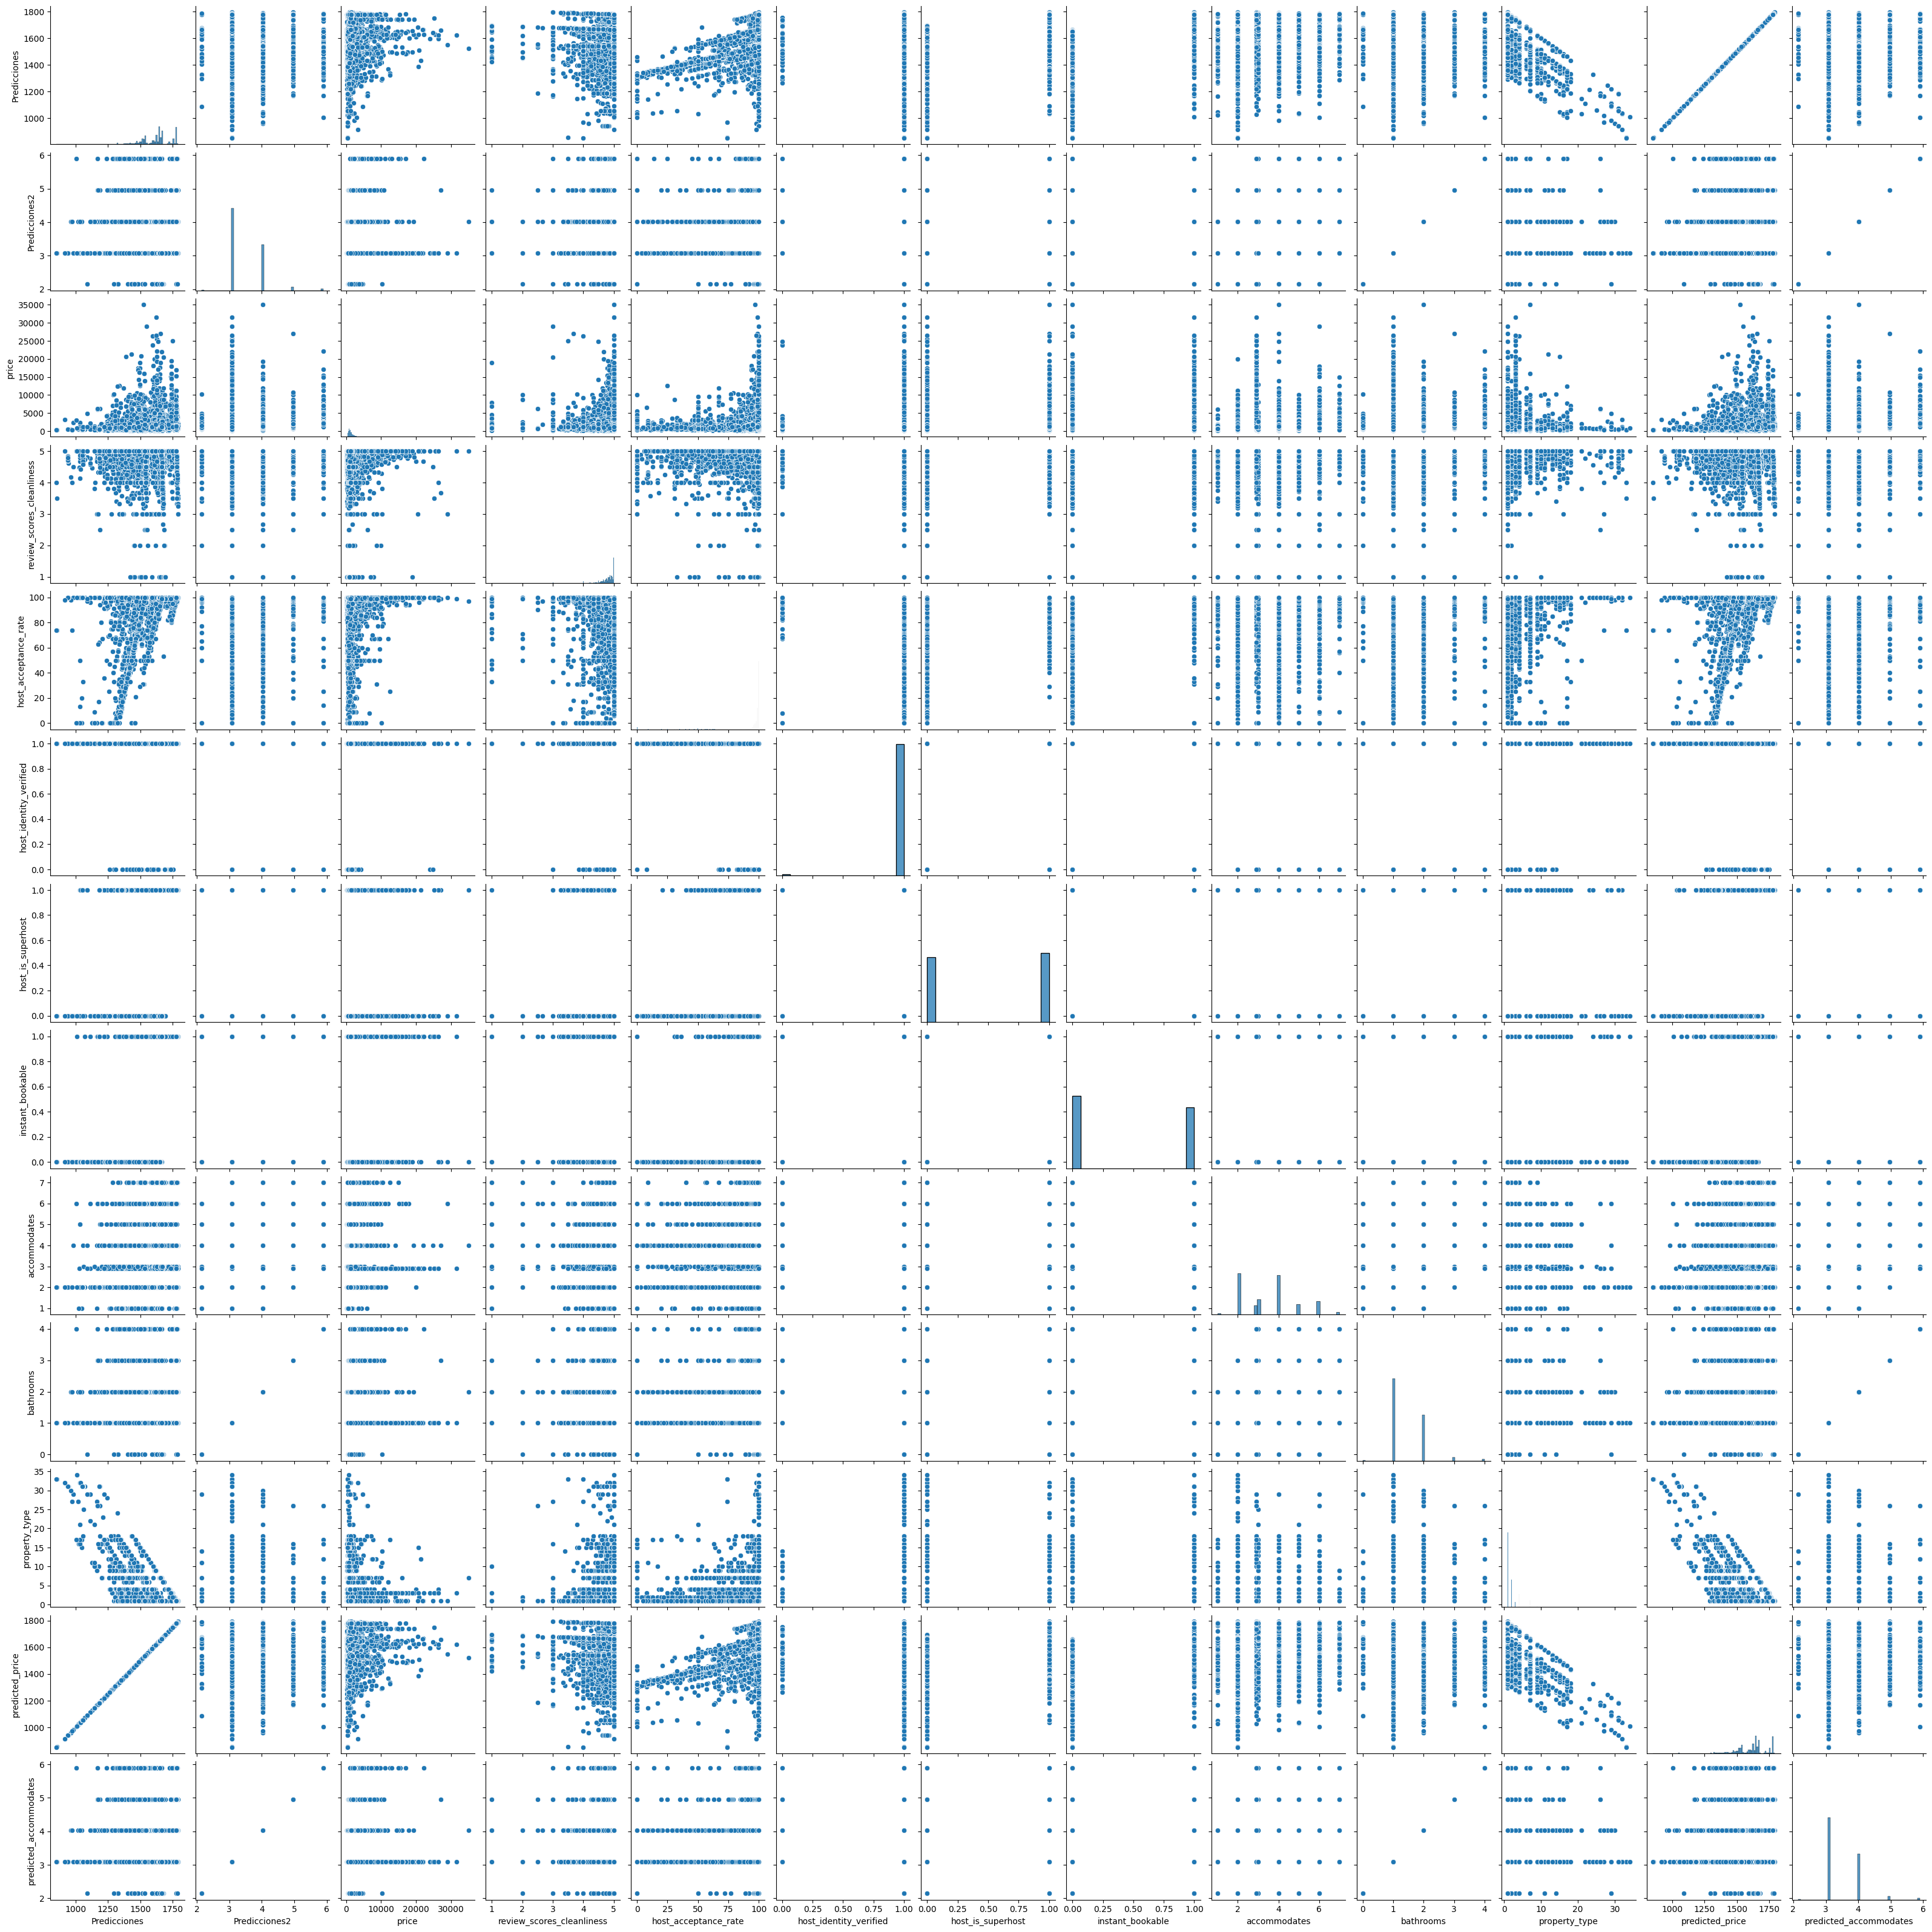

In [93]:
sns.pairplot(df1)

In [94]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.050727,0.073632,0.070816,0.521814,0.028177,0.501504,0.625452,0.078940,0.050727,-0.543209,1.000000,0.050727
Predicciones2,0.050727,1.000000,0.263044,0.036358,-0.015770,0.025823,0.043876,-0.014076,0.415125,1.000000,-0.078923,0.050727,1.000000
price,0.073632,0.263044,1.000000,0.005214,0.038422,0.002075,0.036927,0.046053,0.139952,0.263044,-0.039997,0.073632,0.263044
review_scores_cleanliness,0.070816,0.036358,0.005214,1.000000,0.083363,0.002472,0.219076,-0.063693,0.015885,0.036358,0.004382,0.070816,0.036358
host_acceptance_rate,0.521814,-0.015770,0.038422,0.083363,1.000000,-0.012020,0.230902,0.262758,0.025401,-0.015770,0.008019,0.521814,-0.015770
host_identity_verified,0.028177,0.025823,0.002075,0.002472,-0.012020,1.000000,0.017583,-0.011480,0.001723,0.025823,-0.006508,0.028177,0.025823
host_is_superhost,0.501504,0.043876,0.036927,0.219076,0.230902,0.017583,1.000000,-0.008316,0.027881,0.043876,0.035932,0.501504,0.043876
instant_bookable,0.625452,-0.014076,0.046053,-0.063693,0.262758,-0.011480,-0.008316,1.000000,-0.014009,-0.014076,-0.050016,0.625452,-0.014076
accommodates,0.078940,0.415125,0.139952,0.015885,0.025401,0.001723,0.027881,-0.014009,1.000000,0.415125,-0.124150,0.078940,0.415125
bathrooms,0.050727,1.000000,0.263044,0.036358,-0.015770,0.025823,0.043876,-0.014076,0.415125,1.000000,-0.078923,0.050727,1.000000


In [95]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.050727,0.073632,0.070816,0.521814,0.028177,0.501504,0.625452,0.078940,0.050727,0.543209,1.000000,0.050727
Predicciones2,0.050727,1.000000,0.263044,0.036358,0.015770,0.025823,0.043876,0.014076,0.415125,1.000000,0.078923,0.050727,1.000000
price,0.073632,0.263044,1.000000,0.005214,0.038422,0.002075,0.036927,0.046053,0.139952,0.263044,0.039997,0.073632,0.263044
review_scores_cleanliness,0.070816,0.036358,0.005214,1.000000,0.083363,0.002472,0.219076,0.063693,0.015885,0.036358,0.004382,0.070816,0.036358
host_acceptance_rate,0.521814,0.015770,0.038422,0.083363,1.000000,0.012020,0.230902,0.262758,0.025401,0.015770,0.008019,0.521814,0.015770
host_identity_verified,0.028177,0.025823,0.002075,0.002472,0.012020,1.000000,0.017583,0.011480,0.001723,0.025823,0.006508,0.028177,0.025823
host_is_superhost,0.501504,0.043876,0.036927,0.219076,0.230902,0.017583,1.000000,0.008316,0.027881,0.043876,0.035932,0.501504,0.043876
instant_bookable,0.625452,0.014076,0.046053,0.063693,0.262758,0.011480,0.008316,1.000000,0.014009,0.014076,0.050016,0.625452,0.014076
accommodates,0.078940,0.415125,0.139952,0.015885,0.025401,0.001723,0.027881,0.014009,1.000000,0.415125,0.124150,0.078940,0.415125
bathrooms,0.050727,1.000000,0.263044,0.036358,0.015770,0.025823,0.043876,0.014076,0.415125,1.000000,0.078923,0.050727,1.000000


<Axes: >

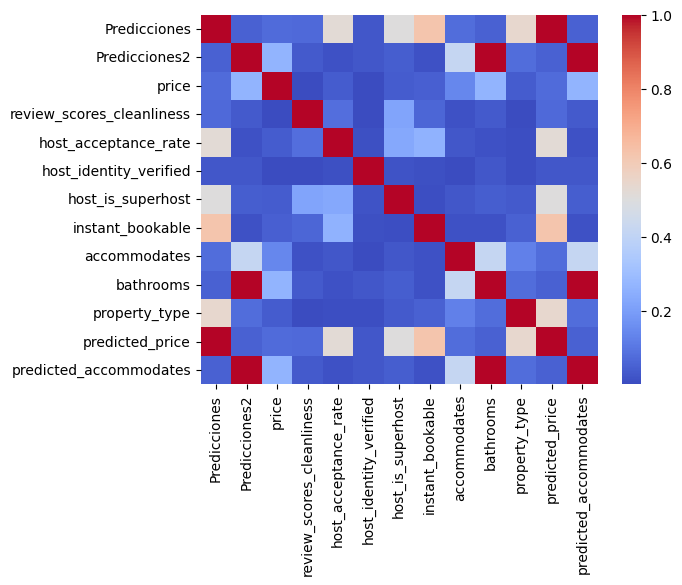

In [96]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

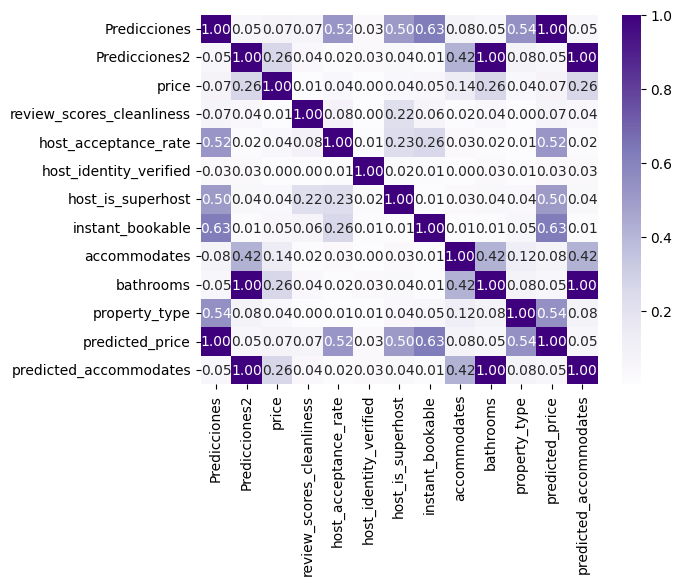

In [97]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [98]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.050727,0.073632,0.070816,0.521814,0.028177,0.501504,0.625452,0.078940,0.050727,-0.543209,1.000000,0.050727
Predicciones2,0.050727,1.000000,0.263044,0.036358,-0.015770,0.025823,0.043876,-0.014076,0.415125,1.000000,-0.078923,0.050727,1.000000
price,0.073632,0.263044,1.000000,0.005214,0.038422,0.002075,0.036927,0.046053,0.139952,0.263044,-0.039997,0.073632,0.263044
review_scores_cleanliness,0.070816,0.036358,0.005214,1.000000,0.083363,0.002472,0.219076,-0.063693,0.015885,0.036358,0.004382,0.070816,0.036358
host_acceptance_rate,0.521814,-0.015770,0.038422,0.083363,1.000000,-0.012020,0.230902,0.262758,0.025401,-0.015770,0.008019,0.521814,-0.015770
host_identity_verified,0.028177,0.025823,0.002075,0.002472,-0.012020,1.000000,0.017583,-0.011480,0.001723,0.025823,-0.006508,0.028177,0.025823
host_is_superhost,0.501504,0.043876,0.036927,0.219076,0.230902,0.017583,1.000000,-0.008316,0.027881,0.043876,0.035932,0.501504,0.043876
instant_bookable,0.625452,-0.014076,0.046053,-0.063693,0.262758,-0.011480,-0.008316,1.000000,-0.014009,-0.014076,-0.050016,0.625452,-0.014076
accommodates,0.078940,0.415125,0.139952,0.015885,0.025401,0.001723,0.027881,-0.014009,1.000000,0.415125,-0.124150,0.078940,0.415125
bathrooms,0.050727,1.000000,0.263044,0.036358,-0.015770,0.025823,0.043876,-0.014076,0.415125,1.000000,-0.078923,0.050727,1.000000


In [99]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.050727,0.073632,0.070816,0.521814,0.028177,0.501504,0.625452,0.078940,0.050727,0.543209,1.000000,0.050727
Predicciones2,0.050727,1.000000,0.263044,0.036358,0.015770,0.025823,0.043876,0.014076,0.415125,1.000000,0.078923,0.050727,1.000000
price,0.073632,0.263044,1.000000,0.005214,0.038422,0.002075,0.036927,0.046053,0.139952,0.263044,0.039997,0.073632,0.263044
review_scores_cleanliness,0.070816,0.036358,0.005214,1.000000,0.083363,0.002472,0.219076,0.063693,0.015885,0.036358,0.004382,0.070816,0.036358
host_acceptance_rate,0.521814,0.015770,0.038422,0.083363,1.000000,0.012020,0.230902,0.262758,0.025401,0.015770,0.008019,0.521814,0.015770
host_identity_verified,0.028177,0.025823,0.002075,0.002472,0.012020,1.000000,0.017583,0.011480,0.001723,0.025823,0.006508,0.028177,0.025823
host_is_superhost,0.501504,0.043876,0.036927,0.219076,0.230902,0.017583,1.000000,0.008316,0.027881,0.043876,0.035932,0.501504,0.043876
instant_bookable,0.625452,0.014076,0.046053,0.063693,0.262758,0.011480,0.008316,1.000000,0.014009,0.014076,0.050016,0.625452,0.014076
accommodates,0.078940,0.415125,0.139952,0.015885,0.025401,0.001723,0.027881,0.014009,1.000000,0.415125,0.124150,0.078940,0.415125
bathrooms,0.050727,1.000000,0.263044,0.036358,0.015770,0.025823,0.043876,0.014076,0.415125,1.000000,0.078923,0.050727,1.000000


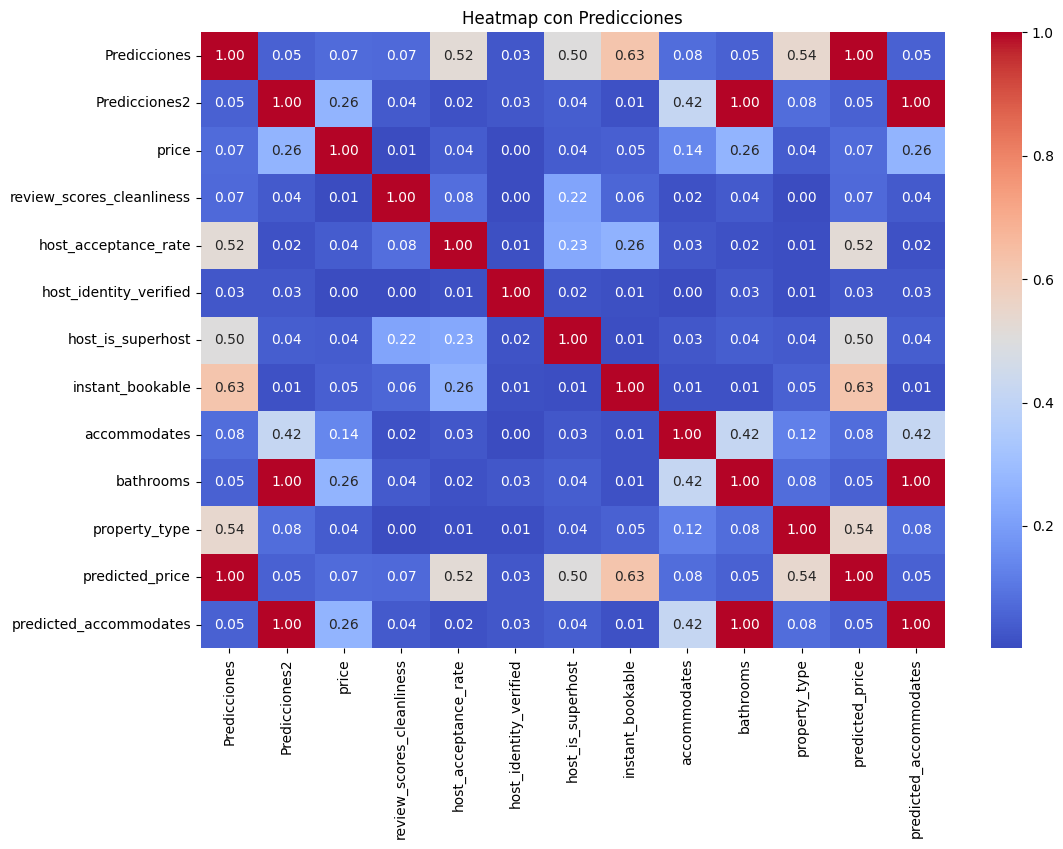

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()